In [20]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick  
import pymysql

In [21]:
# df = pd.read_csv('data.csv')

In [22]:
def get_df_from_mysql():
    con = pymysql.connect(host="localhost", user="root", password="root1234", database="test", charset="utf8")
    c = con.cursor()
    sql = '''select * from data'''
    c.execute(sql)  # 执行SQL语句
    data = c.fetchall()

    # 下面为将获取的数据转化为dataframe格式
    columnDes = c.description  # 获取连接对象的描述信息
    columnNames = [columnDes[i][0] for i in range(len(columnDes))]  # 获取列名
    df = pd.DataFrame([list(i) for i in data], columns=columnNames)  # 得到的data为二维元组，逐行取出，转化为列表，再转化为df
    df[['speed', 'vehicle_state', 'charging_status', 'total_volt', 'total_current', 'mileage', 'standard_soc', 'max_cell_volt',
        'max_volt_cell_id', 'min_cell_volt', 'min_cell_volt_id', 'max_temp', 'max_temp_probe_id',
        'min_temp', 'min_temp_probe_id', 'max_alarm_lvl', 'gen_alarm_sign', 'bat_fault_list',
        'isulate_r', 'dcdc_stat', 'sing_temp_num', 'gear']]\
        =df[['speed', 'vehicle_state', 'charging_status', 'total_volt', 'total_current', 'mileage', 'standard_soc', 'max_cell_volt',
        'max_volt_cell_id', 'min_cell_volt', 'min_cell_volt_id', 'max_temp', 'max_temp_probe_id',
        'min_temp', 'min_temp_probe_id', 'max_alarm_lvl', 'gen_alarm_sign', 'bat_fault_list',
        'isulate_r', 'dcdc_stat', 'sing_temp_num', 'gear']].apply(pd.to_numeric)
    print(df.dtypes)
    con.commit()
    c.close()
    con.close()
    # print("c.description中的内容：", columnDes)
    return df

In [23]:
df = get_df_from_mysql()

yr_modahrmn           object
message_type          object
speed                  int64
vehicle_state          int64
charging_status      float64
total_volt             int64
total_current        float64
mileage                int64
standard_soc           int64
max_cell_volt        float64
max_volt_cell_id       int64
min_cell_volt        float64
min_cell_volt_id       int64
max_temp               int64
max_temp_probe_id      int64
min_temp               int64
min_temp_probe_id      int64
max_alarm_lvl          int64
gen_alarm_sign         int64
bat_fault_list         int64
isulate_r              int64
dcdc_stat              int64
sing_temp_num        float64
gear                   int64
tag                   object
dtype: object


In [24]:
df.sample(10)

,yr_modahrmn,message_type,speed,vehicle_state,charging_status,total_volt,total_current,mileage,standard_soc,max_cell_volt,...,min_temp,min_temp_probe_id,max_alarm_lvl,gen_alarm_sign,bat_fault_list,isulate_r,dcdc_stat,sing_temp_num,gear,tag
7407,2019/8/2 17:33,REALTIME,0,2,4.0,338,0.0,15829,100,3.756,...,30,2,3,4,1,1006,1,28.0,15,O
11194,2019/12/12 0:35,REALTIME,0,1,3.0,65,0.0,17380,57,3.284,...,25,4,1,16392,1,60000,0,28.0,15,UD
3087,2019/9/23 17:03,REALTIME,0,2,4.0,327,0.0,47936,100,3.710,...,31,4,1,16384,0,993,0,28.0,15,D
3337,2019/9/24 17:38,REALTIME,0,2,4.0,323,0.0,48313,100,3.630,...,31,2,1,16384,0,992,0,28.0,15,D
3513,2019/6/18 1:05,REALTIME,0,1,3.0,26,0.0,196255,90,3.320,...,-40,1,1,16392,1,60000,0,28.0,15,UD
6866,2019/6/4 16:14,REALTIME,0,2,3.0,300,0.6,190851,47,3.283,...,-40,1,1,16384,0,60000,0,28.0,15,D
9339,2019/10/24 17:57,REALTIME,0,1,3.0,304,1.7,47817,99,3.320,...,30,2,1,16384,0,60000,0,28.0,15,D
3902,2019/12/9 1:00,REALTIME,0,2,1.0,337,-28.8,65444,99,3.750,...,26,14,3,4,1,1279,1,28.0,15,O
2080,2020/3/17 17:03,REALTIME,0,2,4.0,335,0.0,25991,100,3.766,...,27,2,1,16384,0,1279,0,28.0,15,D
11342,2019/12/16 16:53,REALTIME,0,2,4.0,325,0.0,19450,100,3.634,...,28,2,1,16384,0,1296,0,28.0,15,D


In [55]:
df_tag = df.groupby(['tag'])['message_type'].agg('count').reset_index()

In [56]:
df_tag

,tag,message_type
0,D,9986
1,O,964
2,OD,2
3,U,24
4,UD,1615


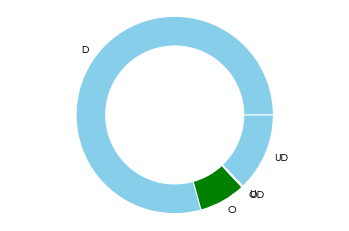

In [58]:

# create data
# 创建数据
names=df_tag['tag'].to_list()
size=df_tag['message_type'].to_list()
 
# Give color names
# 画饼图，label设置标签名，colors代表颜色
plt.pie(size, labels=names, colors=['skyblue','green','blue','red'],wedgeprops=dict(width=0.3, edgecolor='w'))
 
# 设置等比例轴，x和y轴等比例
plt.axis('equal') 
plt.show();


In [52]:
df_current_volt = df.groupby(['yr_modahrmn','total_current','total_volt'])['message_type'].agg('count').reset_index()

In [37]:
df_current_volt

,yr_modahrmn,total_current,total_volt,message_type,dt
0,2019/10/1 10:52,0.0,301,2,2019/10/1
1,2019/10/1 10:52,2.2,301,2,2019/10/1
2,2019/10/1 10:53,0.0,301,2,2019/10/1
3,2019/10/1 10:53,1.4,301,2,2019/10/1
4,2019/10/1 16:07,0.0,25,2,2019/10/1
...,...,...,...,...,...
3201,2020/5/9 16:29,1.4,196,1,2020/5/9
3202,2020/5/9 3:48,0.0,97,1,2020/5/9
3203,2020/5/9 3:48,0.5,136,1,2020/5/9
3204,2020/5/9 4:03,0.8,298,1,2020/5/9


In [38]:
df_current_volt[df_current_volt['dt']=='2019/10/1']

,yr_modahrmn,total_current,total_volt,message_type,dt
0,2019/10/1 10:52,0.0,301,2,2019/10/1
1,2019/10/1 10:52,2.2,301,2,2019/10/1
2,2019/10/1 10:53,0.0,301,2,2019/10/1
3,2019/10/1 10:53,1.4,301,2,2019/10/1
4,2019/10/1 16:07,0.0,25,2,2019/10/1
5,2019/10/1 16:07,0.0,297,2,2019/10/1
6,2019/10/1 17:56,-27.6,336,4,2019/10/1
7,2019/10/1 17:56,0.0,331,26,2019/10/1
8,2019/10/1 17:56,0.0,332,6,2019/10/1
9,2019/10/1 17:57,0.0,71,2,2019/10/1


In [28]:
df_current_volt['dt']= df_current_volt['yr_modahrmn'].apply(lambda x: str(x).split(' ')[0])

In [35]:
df_current_volts= df_current_volt.groupby(['dt'])['total_current','total_volt'].agg('mean').reset_index()

/Users/zhiyue/opt/anaconda3/envs/mactf/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [49]:
df_current_volts = df_current_volts[df_current_volts['dt']>='2020/4/20']

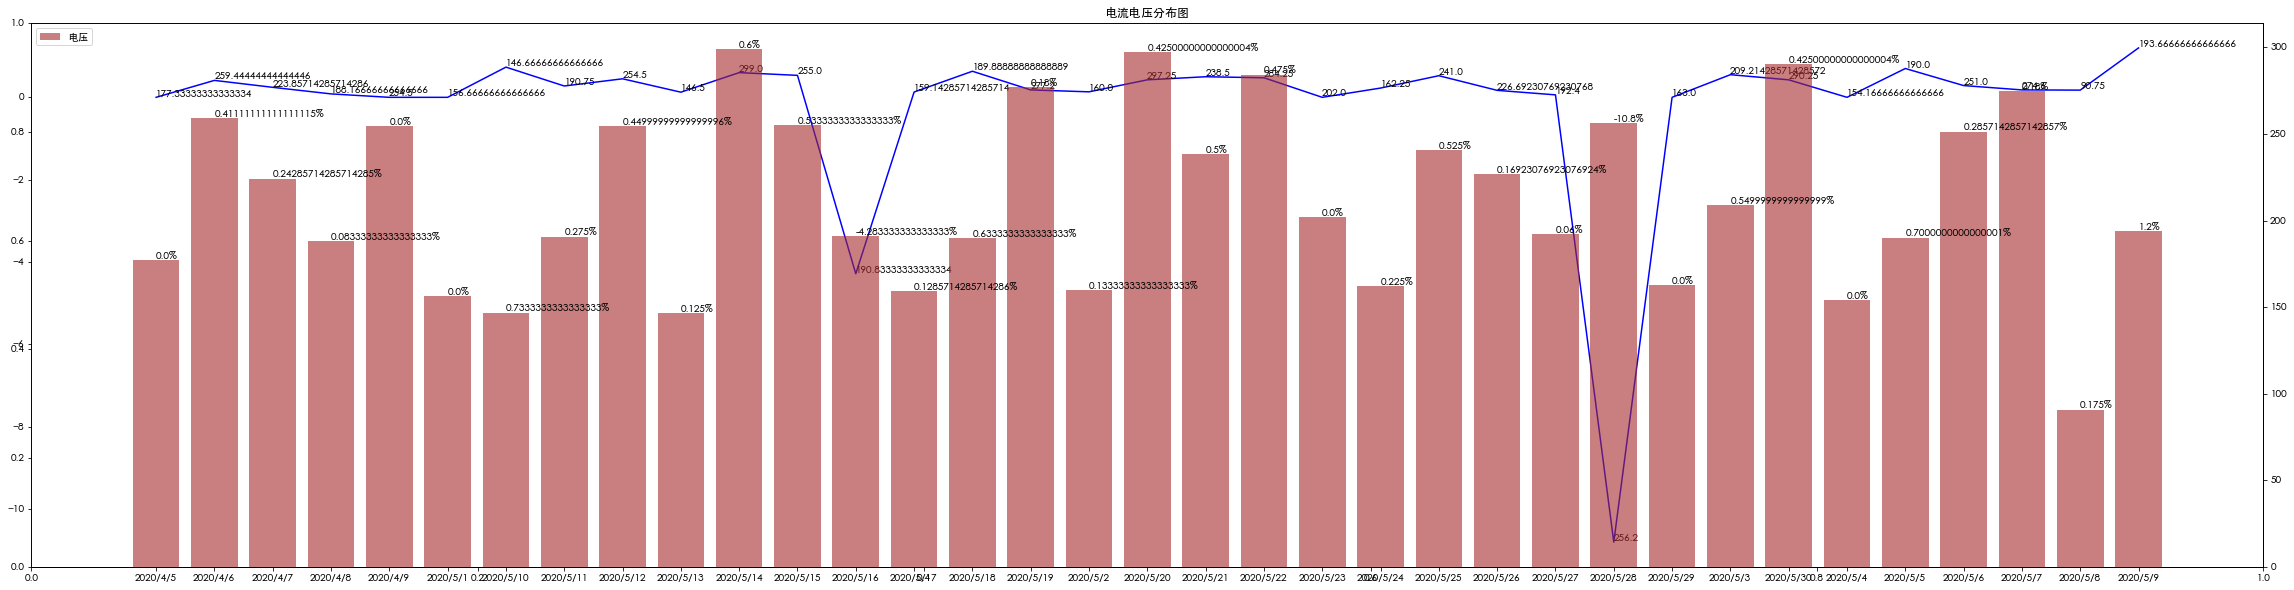

In [50]:
matplotlib.rc("font",family='Heiti TC') #用来正常显示中文标签
fmt='%.2f%%'
# yticks = mtick.FormatStrFormatter(fmt)  #设置百分比形式的坐标轴
fig = plt.figure(figsize=(40,10)) 
label='电流电压分布图'
plt.title(label)
# plt.text(4, 17, r'单位：万元', fontsize=10)
ax1 = fig.add_subplot(111)  
l=[i for i in range(df_current_volts.shape[0])]
b=df_current_volts['total_current'].tolist()
# b=[round(item*100,1) for item in b]

a=df_current_volts['total_volt'].tolist()
lx=df_current_volts['dt'].tolist()
ax1.plot(l, b,'blue',label=u'电流');
# ax1.yaxis.set_major_formatter(yticks)

for i,(_x,_y) in enumerate(zip(l,b)):  
    plt.text(_x,_y,a[i],color='black',fontsize=10,)  #将数值显示在图形上
# ax2.legend(loc=1)
ax2 = ax1.twinx() # this is the important function  
plt.bar(l,a,alpha=0.6,color='brown',label=u'电压')  
ax2.legend(loc=2)
# ax2.set_ylim([0, 2500])  #设置y轴取值范围
for i,(_x,_y) in enumerate(zip(l,a)):  
    plt.text(_x,_y,str(b[i])+'%',color='black',fontsize=10,)  #将数值显示在图形上
# plt.legend(prop={'family':'SimHei','size':8},loc="upper left") 
plt.xticks(l,lx)
plt.show()


In [16]:
df_soc = df.groupby(['standard_soc'])['total_volt'].agg('count').reset_index()

In [17]:
df_soc

,standard_soc,total_volt
0,0,1
1,6,8
2,9,4
3,11,6
4,13,6
...,...,...
87,96,31
88,97,60
89,98,93
90,99,893


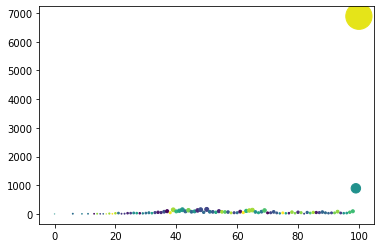

In [34]:
import numpy as np
import matplotlib.pyplot as plt
s = list(df_soc.total_volt/10)
# 气泡颜色
color = np.random.rand(len(list(df_soc.standard_soc)))
# print(color)
# 绘制
plt.scatter(x=list(df_soc.standard_soc),y=list(df_soc.total_volt),s=s,c=color)
# 显示
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12591 entries, 0 to 12590
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr_modahrmn        12591 non-null  object 
 1   message_type       12591 non-null  object 
 2   speed              12591 non-null  int64  
 3   vehicle_state      12591 non-null  int64  
 4   charging_status    12589 non-null  float64
 5   total_volt         12591 non-null  int64  
 6   total_current      12591 non-null  float64
 7   mileage            12591 non-null  int64  
 8   standard_soc       12591 non-null  int64  
 9   max_cell_volt      12591 non-null  float64
 10  max_volt_cell_id   12591 non-null  int64  
 11  min_cell_volt      12591 non-null  float64
 12  min_cell_volt_id   12591 non-null  int64  
 13  max_temp           12591 non-null  int64  
 14  max_temp_probe_id  12591 non-null  int64  
 15  min_temp           12591 non-null  int64  
 16  min_temp_probe_id  125

In [26]:
perc =[.20, .40, .60, .80] 
dfd = df.describe(percentiles = perc).round(4)

In [13]:
dfd

,speed,vehicle_state,charging_status,total_volt,total_current,mileage,standard_soc,max_cell_volt,max_volt_cell_id,min_cell_volt,...,max_temp_probe_id,min_temp,min_temp_probe_id,max_alarm_lvl,gen_alarm_sign,bat_fault_list,isulate_r,dcdc_stat,sing_temp_num,gear
count,12591.0,12591.0000,12589.0000,12591.0000,12591.0000,12591.0000,12591.0000,12591.0000,12591.0000,12591.0000,...,12591.0000,12591.0000,12591.0000,12591.0000,12591.0000,12591.0000,12591.0000,12591.0000,12590.0000,12591.0000
mean,0.0,1.8257,3.4280,282.0318,-1.6783,62094.1279,83.7049,3.5111,38.5021,3.2663,...,6.9608,21.2927,6.0798,1.1535,15099.7163,0.2070,25066.4774,0.1776,27.9222,14.9535
std,0.0,0.3793,0.7646,93.9915,11.3342,62431.1355,24.0640,0.2270,24.6377,0.6672,...,6.6999,21.2935,5.1094,0.5324,4405.1589,0.4052,28920.6765,0.3822,1.4743,0.8336
min,0.0,1.0000,1.0000,0.0000,-1000.0000,12333.0000,0.0000,0.0000,1.0000,0.0000,...,1.0000,-40.0000,1.0000,1.0000,4.0000,0.0000,862.0000,0.0000,0.0000,0.0000
20%,0.0,2.0000,3.0000,299.0000,0.0000,27365.0000,56.0000,3.2830,11.0000,3.2680,...,1.0000,25.0000,2.0000,1.0000,16384.0000,0.0000,1006.0000,0.0000,28.0000,15.0000
40%,0.0,2.0000,3.0000,307.0000,0.0000,32493.0000,99.0000,3.4400,37.0000,3.3700,...,3.0000,28.0000,2.0000,1.0000,16384.0000,0.0000,1279.0000,0.0000,28.0000,15.0000
50%,0.0,2.0000,4.0000,324.0000,0.0000,46444.0000,100.0000,3.6300,37.0000,3.4400,...,3.0000,29.0000,4.0000,1.0000,16384.0000,0.0000,1279.0000,0.0000,28.0000,15.0000
60%,0.0,2.0000,4.0000,326.0000,0.0000,47512.0000,100.0000,3.6420,38.0000,3.4500,...,7.0000,30.0000,4.0000,1.0000,16384.0000,0.0000,60000.0000,0.0000,28.0000,15.0000
80%,0.0,2.0000,4.0000,331.0000,0.0000,65444.0000,100.0000,3.7050,46.0000,3.5000,...,12.0000,31.0000,11.0000,1.0000,16384.0000,1.0000,60000.0000,0.0000,28.0000,15.0000
max,0.0,2.0000,4.0000,339.0000,8.0000,315696.0000,100.0000,3.7720,92.0000,3.5880,...,28.0000,33.0000,28.0000,3.0000,16392.0000,1.0000,60000.0000,1.0000,28.0000,15.0000


In [7]:
bins = list(set(dfd['total_volt'][3:10].to_list()))

In [8]:
bins.sort()

In [9]:
bins

[0.0, 299.0, 307.0, 324.0, 326.0, 331.0, 339.0]

In [10]:
len(bins)

7

In [140]:
for i in range(0,len(bins)):
    print(i)

0
1
2
3
4
5
6


In [144]:
labels = []
for i in range(0,len(bins)):
    if i == 0:
        continue
    elif i<len(bins):
        print('大于'+str(bins[i-1])+'且小于'+str(bins[i]))
        labels.append('大于'+str(bins[i-1])+'且小于'+str(bins[i]))
   

大于0.0且小于299.0
大于299.0且小于307.0
大于307.0且小于324.0
大于324.0且小于326.0
大于326.0且小于331.0
大于331.0且小于339.0


In [145]:
labels

['大于0.0且小于299.0',
 '大于299.0且小于307.0',
 '大于307.0且小于324.0',
 '大于324.0且小于326.0',
 '大于326.0且小于331.0',
 '大于331.0且小于339.0']

In [146]:
df['total_volt_type']=pd.cut(
        df['total_volt'],
        bins,
        right=False,
        labels=labels)

In [148]:
df[['total_volt','total_volt_type']]

,total_volt,total_volt_type
0,331,大于331.0且小于339.0
1,296,大于0.0且小于299.0
2,296,大于0.0且小于299.0
3,296,大于0.0且小于299.0
4,296,大于0.0且小于299.0
...,...,...
12586,333,大于331.0且小于339.0
12587,0,大于0.0且小于299.0
12588,333,大于331.0且小于339.0
12589,0,大于0.0且小于299.0


In [44]:
df_volt = df.groupby(['volt_type'])['total_volt'].agg('count').reset_index()

In [51]:
import numpy as np
label = np.array(df_volt['volt_type'])
X = np.array(df_volt['total_volt'])

Text(0.5, 1.0, 'total_volt')

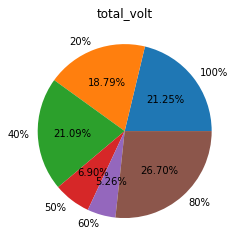

In [60]:
fig = plt.figure()
plt.pie(X,labels=label,autopct='%1.2f%%')
plt.title("total_volt")

array([<AxesSubplot:ylabel='total_volt'>], dtype=object)

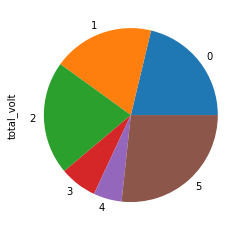

In [27]:
df_volt['total_volt'].plot.pie(subplots=True, figsize=(8, 4))

In [34]:
data1 = pd.Series({'中专':0.2515,'大专':0.3724,'本科':0.3336,'硕士':0.0368,'其他':0.0057})

In [32]:
data1

中专    0.2515
大专    0.3724
本科    0.3336
硕士    0.0368
其他    0.0057
dtype: float64

0    2366
1    2656
2     869
3     662
4    3362
5    2654
Name: total_volt, dtype: int64


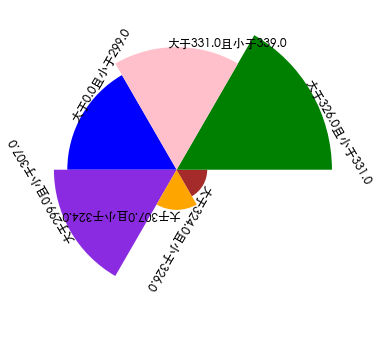

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
matplotlib.rc("font",family='Heiti TC')

pdat = df.groupby(['total_volt_type'])['total_volt'].agg('count').reset_index()

# 角度
l = pdat['total_volt']
print(l)
N = pdat.shape[0]  # 总数
width = 2 * np.pi / N
rad = np.cumsum([width] * N)  # 每个扇形的起始角度

# color
colors = ['blue', 'blueviolet', 'orange', 'brown', 'green', 'pink', 'turquoise', 'tomato']


fig = plt.figure(figsize=(10, 6))  # 创建画布
ax = plt.subplot(projection='polar')
# 删除不必要的内容
# ax.set_ylim(-4, np.ceil(l.max() + 1))  # 中间空白
ax.set_theta_zero_location('N')  # 设置极坐标的起点（即0度）在正上方向
ax.grid(False)  # 不显示极轴
ax.spines['polar'].set_visible(False)  # 不显示极坐标最外的圆形
ax.set_yticks([])  # 不显示坐标间隔
ax.set_thetagrids([])  # 不显示极轴坐标
# 绘画
ax.bar(rad, l, width=width, color=colors, alpha=1)
# ax.bar(rad, 5, width=width, color='white', alpha=0.3)  # 中间添加白色色彩使图案变浅
# ax.bar(rad, 8, width=width, color='white', alpha=0.2)  # 中间添加白色色彩使图案变浅
# text
for i in np.arange(N):
    ax.text(rad[i]+0.08,  # 角度
            l[i] ,  # 长度
            pdat['total_volt_type'][i],  # 文本
            rotation=rad[i] * 180 / np.pi,  # 文字角度
            rotation_mode='anchor',  # this parameter is a trick
            alpha=1,
            fontweight='bold', size=12
            )
plt.show()


In [151]:
pdat

,acreade,value
0,福建,35804.05
1,河北,36010.27
2,湖南,36425.78
3,湖北,39366.55
4,四川,40678.13
5,河南,48055.86
6,浙江,56197.15
7,山东,76469.67
8,江苏,92595.40
9,广东,97277.77


In [168]:
from matplotlib.font_manager import FontManager
import subprocess

mpl_fonts = set(f.name for f in FontManager().ttflist)

print('all font list get from matplotlib.font_manager:')
for f in sorted(mpl_fonts):
    print('\t' + f)

all font list get from matplotlib.font_manager:
	.Aqua Kana
	.Keyboard
	.New York
	.SF Arabic
	.SF Compact
	.SF Compact Rounded
	.SF NS Mono
	.SF NS Rounded
	Academy Engraved LET
	Al Bayan
	Al Nile
	Al Tarikh
	American Typewriter
	Andale Mono
	Apple Braille
	Apple Chancery
	Apple SD Gothic Neo
	Apple Symbols
	AppleGothic
	AppleMyungjo
	Arial
	Arial Black
	Arial Hebrew
	Arial Narrow
	Arial Rounded MT Bold
	Arial Unicode MS
	Athelas
	Avenir
	Avenir Next
	Avenir Next Condensed
	Ayuthaya
	Baghdad
	Bangla MN
	Bangla Sangam MN
	Baskerville
	Beirut
	Big Caslon
	Bodoni 72
	Bodoni 72 Oldstyle
	Bodoni 72 Smallcaps
	Bodoni Ornaments
	Bradley Hand
	Brush Script MT
	Chalkboard
	Chalkboard SE
	Chalkduster
	Charter
	Cochin
	Comic Sans MS
	Copperplate
	Corsiva Hebrew
	Courier
	Courier New
	DIN Alternate
	DIN Condensed
	Damascus
	DecoType Naskh
	DejaVu Sans
	DejaVu Sans Display
	DejaVu Sans Mono
	DejaVu Serif
	DejaVu Serif Display
	Devanagari MT
	Devanagari Sangam MN
	Didot
	Diwan Kufi
	Diwan Thuluth
	

{'UD', 'D', 'O', 'U', 'OD'}
[[ 0.  1.  3. ... 28. 15.  2.]
 [ 0.  2.  3. ... 28. 15.  2.]
 [ 0.  2.  3. ... 28. 15.  2.]
 ...
 [ 0.  2.  4. ... 28. 15.  2.]
 [ 0.  1.  4. ... 28. 15.  1.]
 [ 0.  1.  3. ... 28. 15.  2.]]
       var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1            0.0        0.0   0.666667   0.976401   0.992064   0.108059   
2            0.0        1.0   0.666667   0.873156   0.992064   0.108942   
3            0.0        1.0   0.666667   0.873156   0.992064   0.108942   
4            0.0        1.0   0.666667   0.873156   0.992758   0.108942   
5            0.0        1.0   0.666667   0.873156   0.992758   0.108942   
...          ...        ...        ...        ...        ...        ...   
12586        0.0        1.0   1.000000   0.982301   0.992064   0.108059   
12587        0.0        1.0   1.000000   0.982301   0.992064   0.108059   
12588        0.0        0.0   1.000000   0.000000   0.992064   0.108059   
12589        0.0        1.0   

2022-04-22 22:25:04.530105: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_cudnn_lstm_with_fallback_113904_114086' and '__inference___backward_standard_lstm_114319_114804_specialized_for_StatefulPartitionedCall_at___inference_distributed_function_114893' both implement 'lstm_94673ce9-78a0-49f8-a174-19eab1450437' but their signatures do not match.
2022-04-22 22:25:05.647457: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_115087' and '__inference_standard_lstm_115087_specialized_for_sequential_24_lstm_24_StatefulPartitionedCall_at___inference_distributed_function_115487' both implement 'lstm_1fb65dbc-a791-4287-9775-3fe23d81412f' but their signatures do not match.


600/600 - 7s - loss: 1.6550 - val_loss: 1.5719
Epoch 2/5
600/600 - 0s - loss: 1.5385 - val_loss: 1.4607
Epoch 3/5
600/600 - 0s - loss: 1.4259 - val_loss: 1.3525
Epoch 4/5
600/600 - 0s - loss: 1.3164 - val_loss: 1.2468
Epoch 5/5
600/600 - 0s - loss: 1.2097 - val_loss: 1.1434


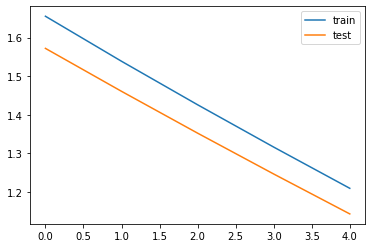

2022-04-22 22:25:06.889379: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_cudnn_lstm_with_fallback_116100' and '__inference_standard_lstm_115989_specialized_for_sequential_24_lstm_24_StatefulPartitionedCall_at___inference_distributed_function_116322' both implement 'lstm_f170af95-81d3-49fa-ba59-f5a4c349935d' but their signatures do not match.


预测结果集： [[[0.32512128 0.1484869  0.19172737 0.14962731 0.18503715]]

 [[0.3016489  0.15197982 0.18663727 0.15633027 0.20340371]]

 [[0.32307506 0.14806491 0.19318748 0.15144725 0.18422529]]

 ...

 [[0.3243835  0.14056824 0.18534851 0.1662401  0.18345958]]

 [[0.3257899  0.14220192 0.18749724 0.15260023 0.19191074]]

 [[0.3375963  0.14498924 0.18366832 0.16027789 0.1734683 ]]]


In [42]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import numpy as np


#转成有监督数据
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    #数据序列(也将就是input) input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
        #预测数据（input对应的输出值） forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    #拼接 put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # 删除值为NAN的行 drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

##数据预处理 load dataset
dataset = read_csv('data.csv', header=0, index_col=0)
dataset = dataset.drop(columns=['message_type'])
print(set(dataset['tag']))
#{'UD', 'D', 'O', 'U', 'OD'}
dataset['tag'] = dataset['tag'].apply(lambda x: 1 if x=='UD' else (2 if x=='D' else( 3 if x=='O' else(4 if x=='U' else 5))))
# dataset_y = dataset['tag']
# print(set(dataset_y))
# dataset = dataset.drop(columns=['tag'])
values = dataset.values
print(values)
#标签编码 integer encode direction
encoder = LabelEncoder()
#values[:, 4] = encoder.fit_transform(values[:, 4])#将数据转换为编码
#保证为float ensure all data is float
for row in values[:,0:-1]:
    values = values.astype('float32')
#print('values[:,:]',values[:,:])
#print('values.shape',values.shape)
#归一化 normalize features
scaler = MinMaxScaler(feature_range=(0, 1)) #MinMaxScaler归一化数据集
scaled = scaler.fit_transform(values)
#转成有监督数据 frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1) #series_to_supervised可以接受单变量或多变量的时间序列，将时间序列数据集转换为监督学习任务的数据集
#删除不预测的列 drop columns we don't want to predict
print(reframed)
#series_to_supervised(data,n,m)n指输入的n步时间，m指输出m步的时间序列
reframed.drop(reframed.columns[[9, 10, 11, 12, 13, 14, 15]], axis=1, inplace=False) #axis=1表示列，axis=0表示行
print(reframed.head())

#数据准备
#把数据分为训练数据和测试数据 split into train and test sets
values = reframed.values
#拿一年的时间长度训练
n_train_hours = 25 * 24
#n_train_hours = 24/60
#划分训练数据和测试数据
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

#拆分输入输出 split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]#train[:,:-1]取所有行的排除一维数组最后一个元素的元素
test_X, test_y = test[:, :-1], test[:, -1]


#reshape输入为LSTM的输入格式 reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
print(train_X.shape)
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print ('train_x.shape, train_y.shape, test_x.shape, test_y.shape')
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

##模型定义 design network
model = Sequential()
model.add(LSTM(50, return_sequences=True))
model.add(Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
#模型训练 fit network
history = model.fit(train_X, train_y, epochs=5, batch_size=512, validation_data=(test_X, test_y), verbose=2,
                    shuffle=False)
#epochs定型周期的数量，batch_size一次训练所抓取的数据样本数量
#输出 plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

#进行预测 make a prediction
yhat = model.predict(test_X)
print('预测结果集：',yhat)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
#预测数据逆缩放 invert scaling for forecast
# inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1) #test_X[:, 1:])
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:, 0]
# inv_yhat = np.array(inv_yhat)
#真实数据逆缩放 invert scaling for actual
# print(set(test_y))
# test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)#将标准化后的数据转换为原始数据
# inv_y = inv_y[:, 0]

#画出真实数据和预测数据
# pyplot.plot(inv_yhat,label='prediction')
# pyplot.plot(inv_y,label='true')
# pyplot.legend()
# pyplot.show()

# calculate RMSE
# rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE: %.3f' % rmse)

In [ ]:
from keras.models import Sequential
from keras.layers import *
from general import *
import os

import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn import datasets
from sklearn.cross_validation import train_test_split

#生成分类数据集
def generate_classification_train_data():
    lris_df = datasets.load_iris()
    X_data = lris_df.data
    y_data = lris_df.target
    X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.2)

    x_train = np.array(X_train)
    x_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    return x_train, y_train, x_test, y_test

#Seque构建方式（推荐）
class SequeClassifier():
    def __init__(self, units):
        self.units = units
        self.model = None
     
    #构建神经网络模型：（根据各层输入输出的shape）搭建网络结构、确定损失函数、确定优化器
    def build_model(self, loss, optimizer, metrics):
        self.model = Sequential()
        self.model.add(LSTM(self.units, return_sequences=True))
        self.model.add(LSTM(self.units))
        self.model.add(Dense(3, activation='softmax')) 
                         #最后一层全连接层。对于N分类问题，最后一层全连接输出个数为N个；对于回归问题，最后一层全连接层的输出为1
                        #激活函数也很重要，如果没有使用激活函数或者激活函数选择不当，很有可能产生梯度消失或梯度爆炸模型无法学习
        
        self.model.compile(loss=loss, 
                           optimizer=optimizer,   #优化器的选择很重要
                           metrics=metrics)

if __name__ == "__main__":
    #1 获取训练数据集，并调整为三维输入格式
    x_train, y_train, x_test, y_test = generate_classification_train_data()
    # 二维-->三维。构建的方法：
        # 方法一、直接 x_train[:, :, np.newaxis] 把原本二维数组中每一行变成二维，改变后每条记录shape变化为：(1,m)-->(m,1)
        # 方法二、对于时序问题，把每行记录拓展为包含包括该条记录时刻共n个时刻的记录，改变后每条记录shape变化为：(1,m)-->(n,m)
        # 方法三、对于原本二维数组中每一行，将其特征均等归类，归为k类，成为一个新的二维数组，改变后每条记录shape变化为：(1,m)-->(k,m/k)
        
    x_train = x_train[:, :, np.newaxis]
    x_test = x_test[:, :, np.newaxis]
    
    #2 构建神经网络模型：（根据各层输入输出的shape）搭建网络结构、确定损失函数、确定优化器
    units = 128 #lstm细胞个数
    loss = "sparse_categorical_crossentropy"  #损失函数类型
    optimizer = "adam"  #优化器类型
    metrics = ['accuracy']  #评估方法类型
    sclstm = SequeClassifier(units) 
    sclstm.build_model(loss, optimizer, metrics)

    #3 训练模型
    epochs = 30
    batch_size = 64
    sclstm.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

    #4 模型评估
    score = sclstm.model.evaluate(x_test, y_test, batch_size=16)
    print("model score:", score)
    
    # 模型应用：预测
    #proba_prediction = sclstm.model.predict(x_test)
    
    #5 模型持久化，把模型保存在本地
    dirs = "model"
    if not os.path.exists(dirs):
        os.makedirs(dirs)
    print("正在保存模型......")
    sclstm.model.save(dirs+"/classifier_model.h5")
    print("模型已保存.save path-->dirs%s"%"/classifier_model.h5")
    
    #6 从指定模型保存的位置读取模型，做预测
    from keras.models import load_model
    read_model = load_model(dirs+"/classifier_model.h5")
    out = read_model.predict(x_test)
    print("out:%s"%out)
